In [1]:
# импорт необходимых библиотек для лабораторной работы
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

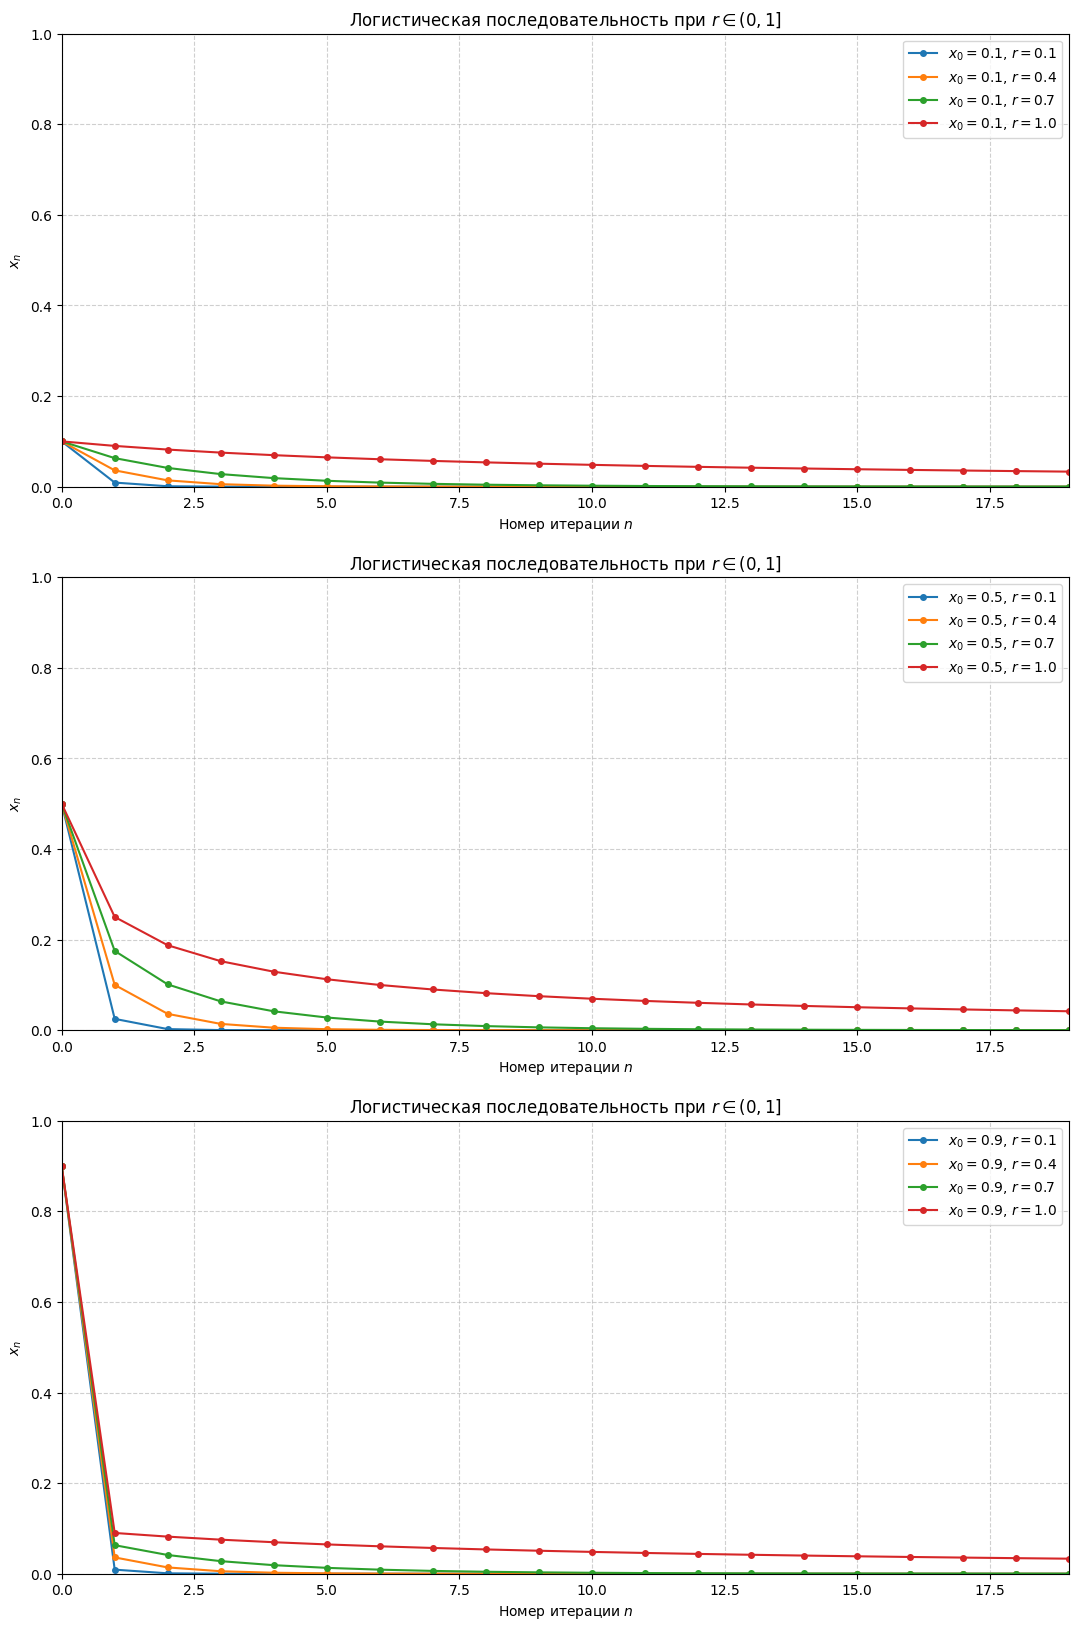

In [2]:
def logistic_sequence(x0, r, n_steps=50):
    """Генерирует последовательность x_{n+1} = r * x_n * (1 - x_n)"""
    xs = [x0]
    for _ in range(n_steps - 1):
        x_next = r * xs[-1] * (1 - xs[-1])
        xs.append(x_next)
    return np.array(xs)


def generate_logistic_sequence(ax, x0, r_vals, n_steps):
    """Создает график логистической последовательности с заданными параметрами"""
    for r in r_vals:
      # Генерация последовательности
      xs = logistic_sequence(x0, r, n_steps)

      # Визуализация последовательности
      ax.plot(range(n_steps), xs, marker='o', markersize=4, linewidth=1.5, label=f'$x_0 = {x0}$, $r = {r}$')

    ax.axhline(0, color='black', linewidth=0.7)
    ax.set_title('Логистическая последовательность при $r \\in (0, 1]$')
    ax.set_xlabel('Номер итерации $n$')
    ax.set_ylabel('$x_n$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, n_steps - 1)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()


# Параметры
x0_vals = [0.1, 0.5, 0.9]
r_vals = [0.1, 0.4, 0.7, 1.0]
n_steps = 20

# Построение графика
fig, axes = plt.subplots(3, 1, figsize=(13, 20))

for i in range(len(x0_vals)):
    generate_logistic_sequence(axes[i], x0_vals[i], r_vals, n_steps)

plt.show()

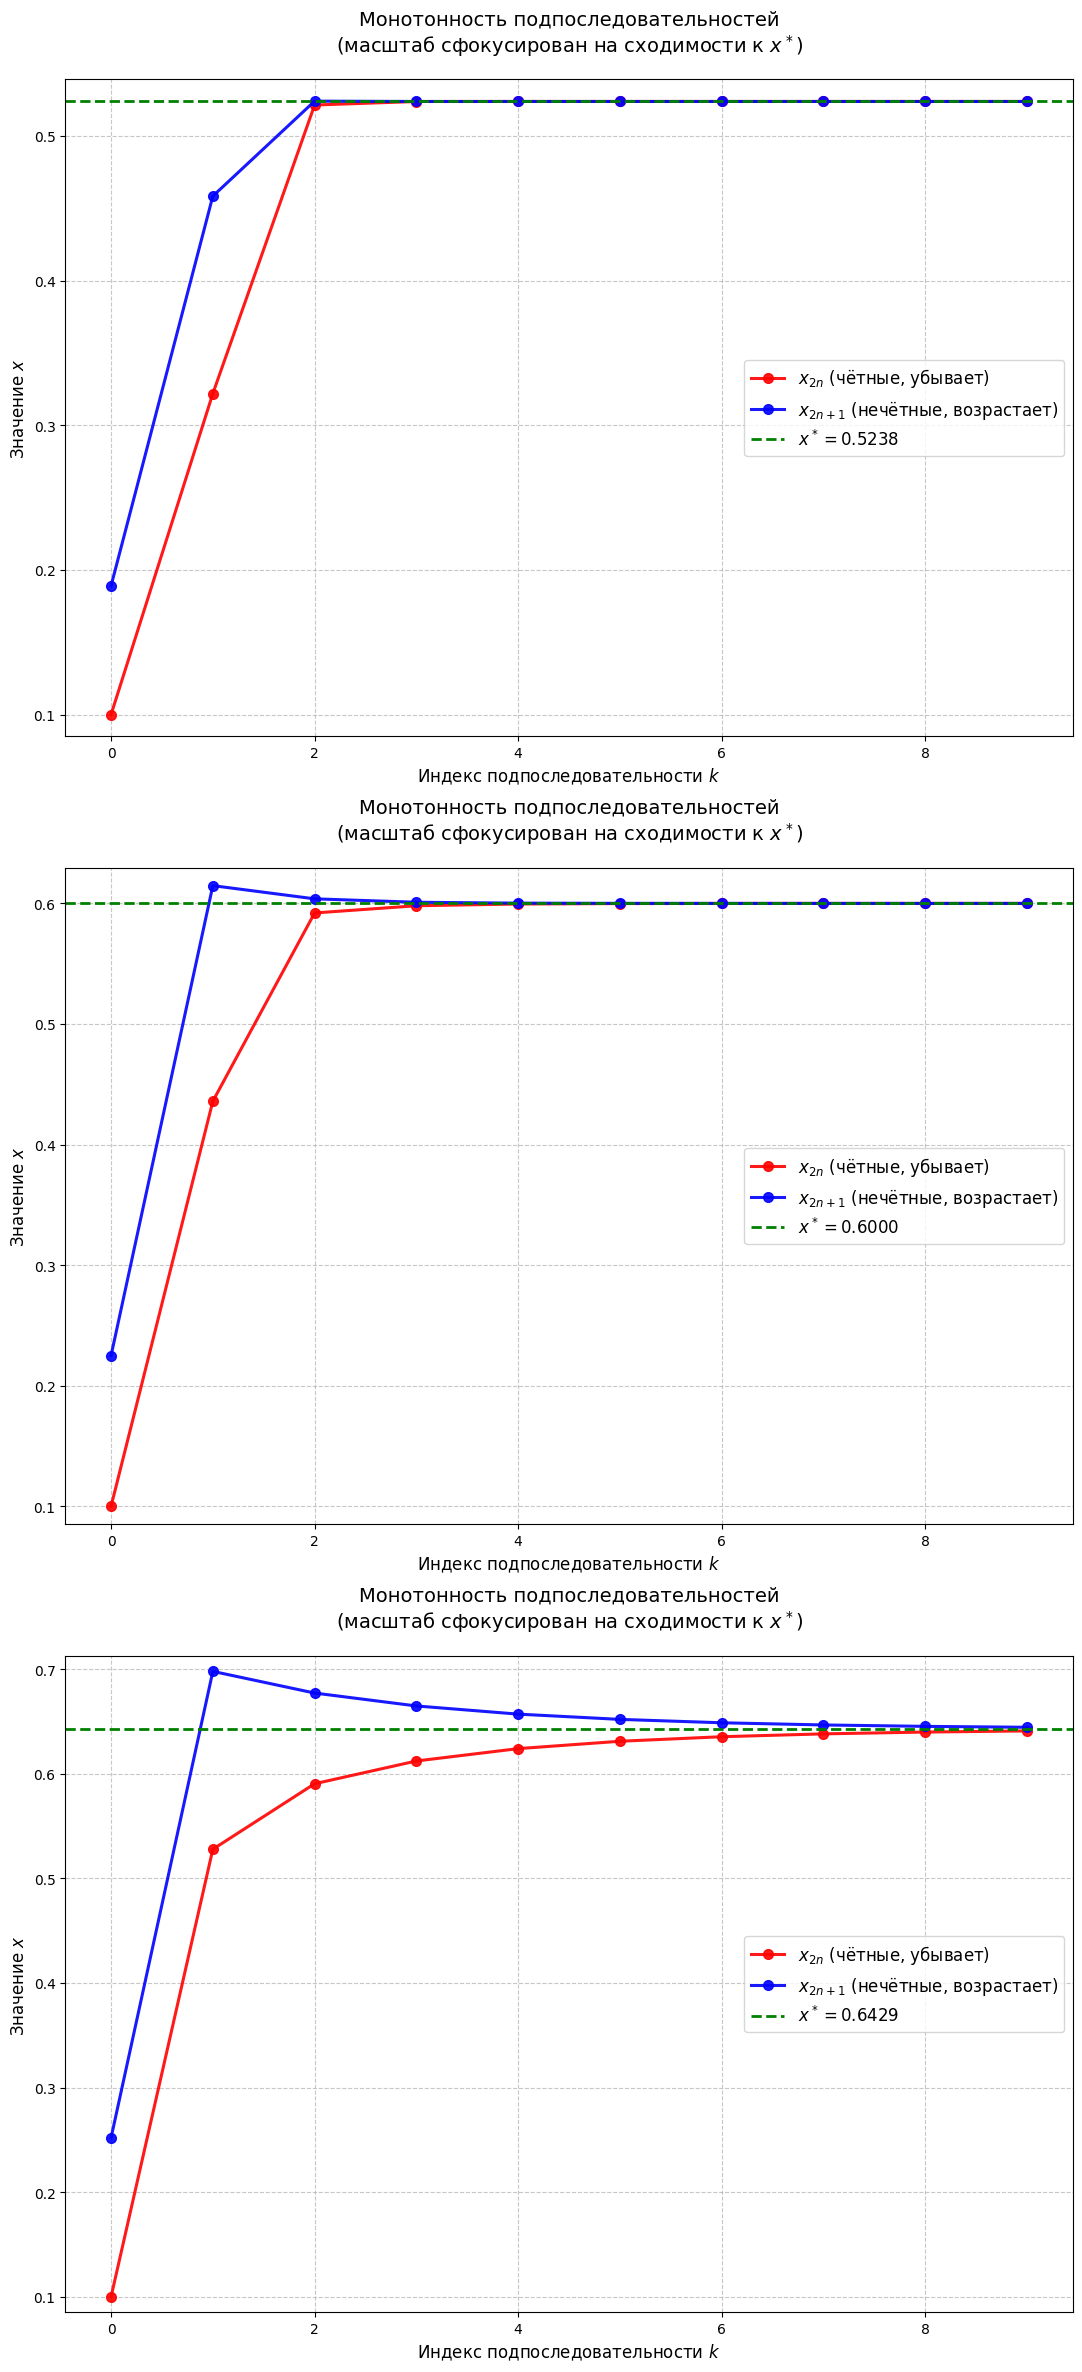

In [3]:
def logistic_map(x, r):
    """Функция логистического отображения"""
    return r * x * (1 - x)


def generate_sequence(x0, r, n_steps):
    """Генерирует логистическую последовательность {x_n}"""
    xs = [x0]
    for _ in range(n_steps - 1):
        xs.append(logistic_map(xs[-1], r))
    return np.array(xs)


# Параметры
r_vals = [2.1, 2.5, 2.8]
x0 = 0.1
n_steps = 20

# --- Только график подпоследовательностей (без общей последовательности) ---
fig, axes = plt.subplots(3, 1, figsize=(13, 29))

for i, ax in enumerate(axes):
    r = r_vals[i]
    x_star = 1 - 1 / r

    # Генерация
    xs = generate_sequence(x0, r, n_steps)
    even_idx = np.arange(0, n_steps, 2)
    odd_idx = np.arange(1, n_steps, 2)
    x_even = xs[even_idx]  # x_0, x_2, x_4, ...
    x_odd = xs[odd_idx]  # x_1, x_3, x_5, ...

    # Отображаем только подпоследовательности
    k_even = np.arange(len(x_even))
    k_odd = np.arange(len(x_odd))

    ax.plot(k_even, x_even, 'ro-', label=r'$x_{2n}$ (чётные, убывает)',
            linewidth=2.2, markersize=7, alpha=0.9)
    ax.plot(k_odd, x_odd, 'bo-', label=r'$x_{2n+1}$ (нечётные, возрастает)',
            linewidth=2.2, markersize=7, alpha=0.9)

    # Сужение масштаба по вертикали вокруг x* ---
    margin = 0.015  # небольшой отступ сверху и снизу
    y_min = min(x_odd.min(), x_even.min()) - margin
    y_max = max(x_even.max(), x_odd.max()) + margin

    ax.set_ylim(y_min, y_max)

    # Неподвижная точка
    ax.axhline(x_star, color='green', linestyle='--', linewidth=2,
                label=rf'$x^* = {x_star:.4f}$')

    ax.set_title('Монотонность подпоследовательностей\n(масштаб сфокусирован на сходимости к $x^*$)',
              fontsize=14, pad=20)
    ax.set_xlabel('Индекс подпоследовательности $k$', fontsize=12)
    ax.set_ylabel('Значение $x$', fontsize=12)
    ax.legend(fontsize=12, loc='center right')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.show()


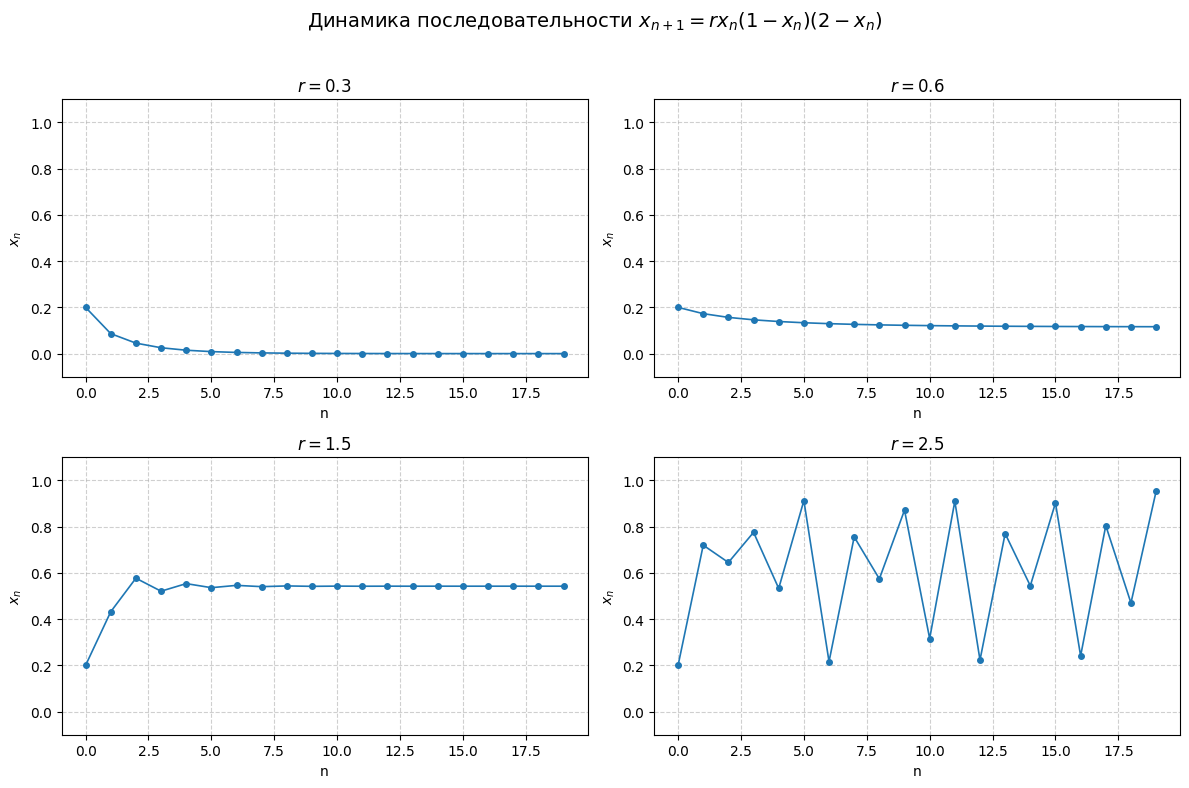

In [4]:
def g(x, r):
    """Точечное отображение, функция которого была взята из условия задачи"""
    return r * x * (1 - x) * (2 - x)


def iterate(x0, r, n_steps):
    """Генерирует точечную последовательность {x_n}"""
    xs = [x0]
    for _ in range(n_steps - 1):
        xs.append(g(xs[-1], r))
    return np.array(xs)


# Параметры
x0 = 0.2
n_steps = 20
r_values = [0.3, 0.6, 1.5, 2.5]

plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values, 1):
    xs = iterate(x0, r, n_steps)
    plt.subplot(2, 2, i)
    plt.plot(xs, 'o-', markersize=4, linewidth=1.2)
    plt.title(f'$r = {r}$', fontsize=12)
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(-0.1, 1.1)

plt.suptitle('Динамика последовательности $x_{n+1} = r x_n (1 - x_n)(2 - x_n)$', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()